In [1]:
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fft(a, inverse=False):
    if len(a) <= 1:
        return a.astype(complex)
    N = len(a)

    omega = cmath.exp(2j * math.pi / N)
    if inverse:
        omega = 1 / omega

    even, odd = fft(a[::2], inverse), fft(a[1::2], inverse)

    omega_pow = 1
    result = np.empty(N, dtype=complex)
    for i in range(N // 2):
        result[i] = even[i] + omega_pow * odd[i]
        result[i + N // 2] = even[i] - omega_pow * odd[i]
        omega_pow *= omega
    return result

In [3]:
def test(f, remainder_size_ratio=1, axes=plt):
    N = 128
    lower_bound = 0
    upper_bound = 10

    f = np.vectorize(f)
    x = np.linspace(lower_bound, upper_bound, N + 1)[:-1]
    y = np.apply_along_axis(f, 0, x)
    axes.plot(x, y, label="Source ({} points)".format(N))

    y_fft = fft(y)
    reduced_N = int(N * remainder_size_ratio)
    y_fft[reduced_N:N] = 0
    y_recv = fft(y_fft, True) / N

    axes.plot(x, y_recv, label="IDFT (first {} points)".format(reduced_N))
    axes.legend()

D:\Users\andti\Documents\AaDS venv\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


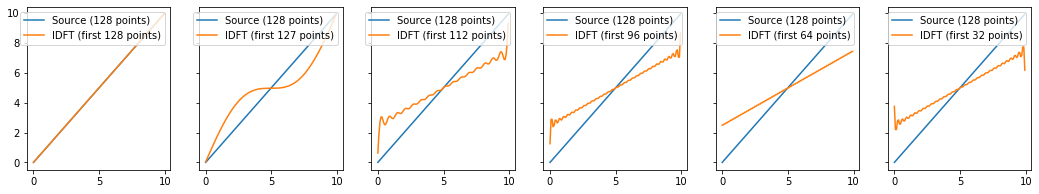

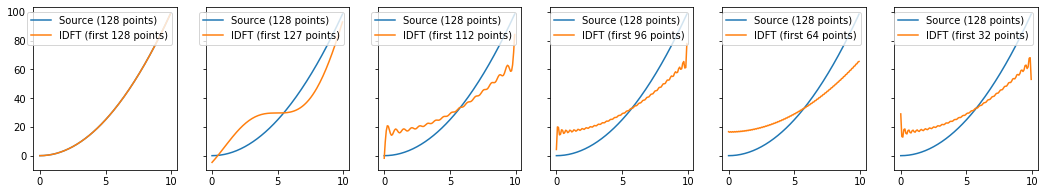

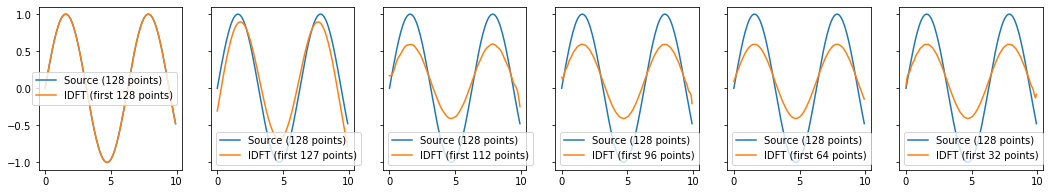

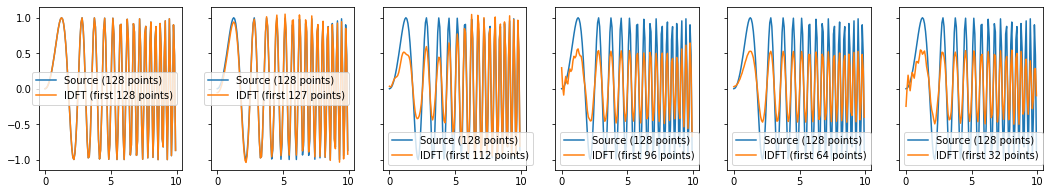

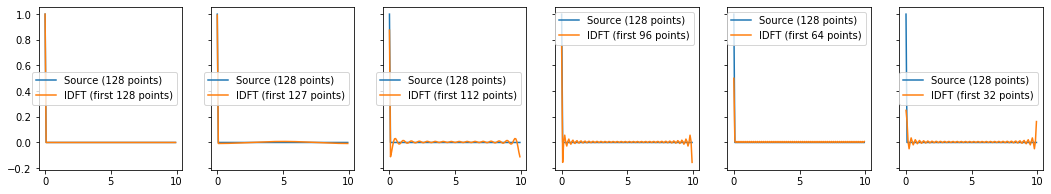

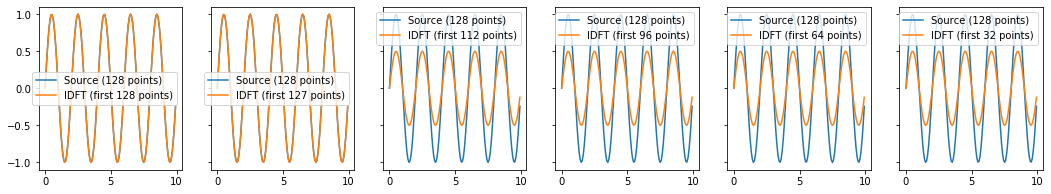

In [4]:
f_list = [
    lambda x: x,
    lambda x: x**2,
    lambda x: round(math.sin(x), 5),
    lambda x: round(math.sin(x**2), 5),
    lambda x: round(math.sin(x) / x if x else 1, 5),

    lambda x: round(math.sin(x * math.pi), 5)
]
coefs = [1, 127/128, 112/128, 96/128, 64/128, 32/128]

for i in range(len(f_list)):
    fig, ax = plt.subplots(1, len(coefs), sharey='row')
    for j in range(len(coefs)):
        test(f_list[i], coefs[j], ax[j])
    fig.set_size_inches(len(coefs) * 3, 3)
    plt.show()